In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [3]:
df=pd.read_csv("C:/Users/usind/Downloads/Datasets-main/Datasets-main/titanic-training-data.csv")

In [4]:
df.shape

(891, 12)

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### missing values treatment

In [8]:
median1=df["Age"].median()
df["Age"]=df["Age"].fillna(median1)

In [9]:
mode1=df["Embarked"].mode()[0]
df["Embarked"]=df["Embarked"].fillna(mode1)


In [10]:
df.drop("Cabin",axis=1,inplace=True)

In [11]:
df.drop("Name",axis=1,inplace=True)

In [12]:
df.drop("Ticket",axis=1,inplace=True)

In [13]:
df.sample(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
373,374,0,1,male,22.0,0,0,135.6333,C
827,828,1,2,male,1.0,0,2,37.0042,C
364,365,0,3,male,28.0,1,0,15.5000,Q
256,257,1,1,female,28.0,0,0,79.2000,C
888,889,0,3,female,28.0,1,2,23.4500,S
288,289,1,2,male,42.0,0,0,13.0000,S
489,490,1,3,male,9.0,1,1,15.9000,S
294,295,0,3,male,24.0,0,0,7.8958,S
136,137,1,1,female,19.0,0,2,26.2833,S
638,639,0,3,female,41.0,0,5,39.6875,S


In [14]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [15]:
df=pd.get_dummies(df,columns=["Sex","Embarked"])

In [16]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Sex_female       uint8
Sex_male         uint8
Embarked_C       uint8
Embarked_Q       uint8
Embarked_S       uint8
dtype: object

In [17]:
x=df.drop(["Survived"],axis=1)
y=df[["Survived"]]

In [18]:
x_train , x_test , y_train , y_test = train_test_split(x, y, test_size=0.30,random_state=0)

In [19]:
model=LogisticRegression()

In [20]:
model.fit(x_train, y_train)

LogisticRegression()

In [21]:
model.score(x_train, y_train)

0.7993579454253612

In [22]:
model.score(x_test, y_test)

0.7910447761194029

In [23]:
predictions=model.predict(x_test)

In [24]:
from sklearn import metrics

<Axes: >

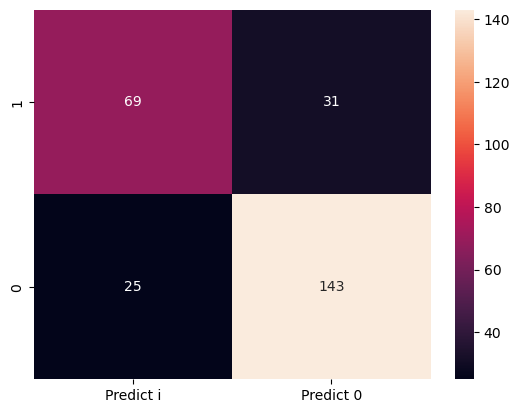

In [25]:
cm=metrics.confusion_matrix(y_test, predictions, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                    columns = [i for i in ["Predict i","Predict 0"]])
sns.heatmap(df_cm, annot=True,fmt='g')

In [26]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84       168
           1       0.73      0.69      0.71       100

    accuracy                           0.79       268
   macro avg       0.78      0.77      0.77       268
weighted avg       0.79      0.79      0.79       268



### support vector classifier model

In [27]:
from sklearn.svm import SVC

In [28]:
model_svc=SVC(kernel='linear')

In [29]:
model_svc.fit(x_train,y_train)

SVC(kernel='linear')

In [30]:
model_svc.score(x_train,y_train)

0.7945425361155698

In [31]:
model_svc.score(x_test,y_test)

0.7910447761194029

### decision tree classifier model

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
model_dtc=DecisionTreeClassifier(criterion='entropy',max_depth=3)

In [34]:
model_dtc.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [35]:
model_dtc.score(x_train,y_train)

0.8362760834670947

In [36]:
model_dtc.score(x_test,y_test)

0.8208955223880597

### KNN model

In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
model_knn=KNeighborsClassifier()

In [39]:
model_knn.fit(x_train,y_train)

KNeighborsClassifier()

In [40]:
model_knn.score(x_train,y_train)

0.7367576243980738

In [41]:
model_knn.score(x_test,y_test)

0.6044776119402985

In [42]:
### standardization

In [43]:
from scipy.stats import zscore

In [44]:
xscaled=x.apply(zscore)

In [45]:
x_train , x_test , y_train , y_test = train_test_split(xscaled, y, test_size=0.30,random_state=0)

In [46]:
model_knn=KNeighborsClassifier()

In [47]:
model_knn.fit(x_train,y_train)

KNeighborsClassifier()

In [48]:
model_knn.score(x_train,y_train)

0.8459069020866774

In [49]:
model_knn.score(x_test,y_test)

0.7798507462686567

In [50]:
### Bagging classifier

In [51]:
from sklearn.ensemble import BaggingClassifier

In [52]:
model_bgc=BaggingClassifier(n_estimators=100,base_estimator=model_dtc)

In [53]:
model_bgc.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_depth=3),
                  n_estimators=100)

In [54]:
model_bgc.score(x_train,y_train)

0.8394863563402889

In [55]:
model_bgc.score(x_test,y_test)

0.8134328358208955

In [56]:
### boosting

In [57]:
from sklearn.ensemble import AdaBoostClassifier

In [58]:
model_bsg=AdaBoostClassifier(n_estimators=10)

In [59]:
model_bsg.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=10)

In [60]:
model_bsg.score(x_train,y_train)

0.8250401284109149

In [61]:
model_bsg.score(x_test,y_test)

0.8134328358208955

In [62]:
### grad

In [63]:
from sklearn.ensemble import GradientBoostingClassifier

In [64]:
model_gbc=GradientBoostingClassifier(n_estimators=10,max_depth=3)

In [65]:
model_gbc.fit(x_train,y_train)

GradientBoostingClassifier(n_estimators=10)

In [66]:
model_gbc.score(x_train,y_train)

0.8378812199036918

In [67]:
model_bgc.score(x_test,y_test)

0.8134328358208955